In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn import model_selection
from sklearn.model_selection import train_test_split,RepeatedKFold,cross_val_score
from plotnine import ggplot, aes, geom_tile, scale_fill_gradient, theme_minimal, theme, geom_boxplot
from plotnine import ggsave, scale_y_reverse, labs, scale_fill_gradient2,geom_line,geom_point,scale_color_manual,geom_text
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score,roc_curve, auc
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
import xgboost as xgb
from tqdm import tqdm
from plotnine import element_text

In [2]:
college_data = pd.read_csv('location_class_college.csv')
data = college_data
dataset = data
dataset.info()
dataset = dataset.drop(columns=['store_id', 'date', 'split'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   store_id                  1070 non-null   int64  
 1   date                      1070 non-null   object 
 2   total.sales               1070 non-null   float64
 3   location_class            1070 non-null   object 
 4   dayofweek                 1070 non-null   object 
 5   total_promotions          1070 non-null   int64  
 6   type_PointsBonus          1070 non-null   int64  
 7   type_FreeProduct          1070 non-null   int64  
 8   type_ProductDiscount      1070 non-null   int64  
 9   type_FreeDelivery         1070 non-null   int64  
 10  type_OverallDiscount      1070 non-null   int64  
 11  channel_All               1070 non-null   int64  
 12  channel_Ecomm             1070 non-null   int64  
 13  channel_InStore           1070 non-null   int64  
 14  channel_

In [3]:
# numeric_cols = dataset.select_dtypes(include='number')
# # Select only numeric columns
# numeric_cols = dataset.select_dtypes(include='number')

# # Compute correlation matrix and reshape for heatmap
# corr = numeric_cols.corr().round(2).reset_index().melt(id_vars="index", var_name="columns", value_name="value")
# corr = corr.rename(columns={"index": "rows"})

# # Plot
# plot = (ggplot(corr, aes(x='columns', y='rows', fill='value'))
#         + geom_tile()
#         + scale_fill_gradient2(low="blue", high="red", mid="white", midpoint=0)
#         #+ geom_text(aes(label='value'), color='black', size=8)
#         + theme_minimal()
#         + theme(axis_text_x=element_text(rotation=45, ha='right')) # ha = horizontal alignment
    
#         + labs(title="Correlation Matrix Heatmap"))

# #plot.show() # or print(plot)
# ggsave(plot, filename='correlation_matrix.png', width=20, height=20, dpi=300)
# plot.show()

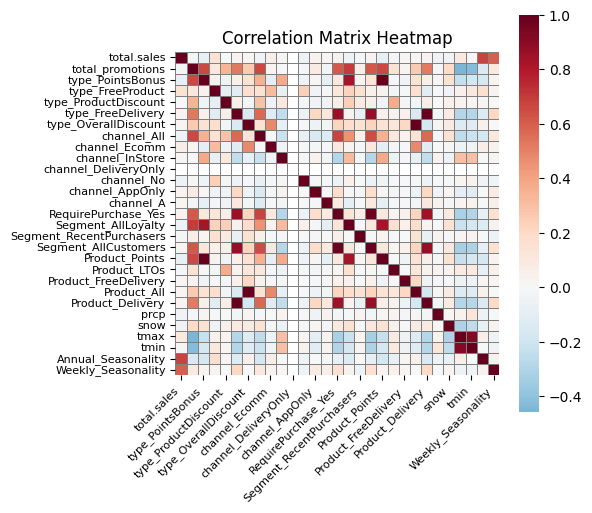

In [8]:
# Select only numeric columns
numeric_cols = dataset.select_dtypes(include='number')

# Compute correlation matrix
corr = numeric_cols.corr().round(2)

plt.figure(figsize=(8*3/4, 11*3/4))

sns.heatmap(
    corr, 
    cmap="RdBu_r", 
    center=0, 
    cbar=True, 
    square=True,
    linewidths=0.5, 
    linecolor='gray',
    annot=False,
    cbar_kws={"shrink": 0.5},  # shrink the colorbar height
)

# Rotate and shrink axis labels
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

plt.title("Correlation Matrix Heatmap", fontsize=12)

plt.tight_layout()
plt.savefig("correlation_matrix_seaborn.png", dpi=300)
plt.show()


In [9]:
corr

,total.sales,total_promotions,type_PointsBonus,type_FreeProduct,type_ProductDiscount,type_FreeDelivery,type_OverallDiscount,channel_All,channel_Ecomm,channel_InStore,...,Product_LTOs,Product_FreeDelivery,Product_All,Product_Delivery,prcp,snow,tmax,tmin,Annual_Seasonality,Weekly_Seasonality
total.sales,1.00,-0.03,-0.08,0.14,-0.00,0.03,0.02,-0.04,0.07,0.01,...,-0.02,0.02,0.02,0.03,-0.04,-0.04,0.10,0.01,0.67,0.60
total_promotions,-0.03,1.00,0.66,0.11,0.34,0.53,0.26,0.66,0.02,-0.01,...,0.14,0.03,0.26,0.52,-0.02,0.20,-0.46,-0.43,-0.15,0.10
type_PointsBonus,-0.08,0.66,1.00,0.04,-0.04,0.05,0.14,0.35,-0.10,0.38,...,-0.01,-0.04,0.14,0.06,0.01,0.14,-0.23,-0.18,-0.17,0.03
type_FreeProduct,0.14,0.11,0.04,1.00,-0.09,-0.11,0.17,0.14,0.31,-0.07,...,-0.03,-0.01,0.17,-0.11,-0.01,-0.04,0.05,0.11,0.17,0.03
type_ProductDiscount,-0.00,0.34,-0.04,-0.09,1.00,0.06,-0.03,0.29,-0.05,0.10,...,0.37,-0.02,-0.03,0.07,0.00,0.05,0.03,0.02,0.01,-0.00
type_FreeDelivery,0.03,0.53,0.05,-0.11,0.06,1.00,-0.15,0.57,-0.12,-0.24,...,0.04,0.05,-0.15,0.99,-0.03,0.09,-0.29,-0.29,-0.14,0.21
type_OverallDiscount,0.02,0.26,0.14,0.17,-0.03,-0.15,1.00,0.14,0.48,-0.08,...,0.12,0.21,1.00,-0.17,0.01,0.08,-0.13,-0.12,0.05,-0.00
channel_All,-0.04,0.66,0.35,0.14,0.29,0.57,0.14,1.00,-0.01,-0.22,...,0.11,0.04,0.14,0.57,-0.02,0.14,-0.25,-0.21,-0.17,0.11
channel_Ecomm,0.07,0.02,-0.10,0.31,-0.05,-0.12,0.48,-0.01,1.00,-0.04,...,-0.02,-0.01,0.48,-0.12,0.00,-0.02,-0.05,-0.04,0.07,0.04
channel_InStore,0.01,-0.01,0.38,-0.07,0.10,-0.24,-0.08,-0.22,-0.04,1.00,...,-0.05,-0.02,-0.08,-0.24,0.03,-0.06,0.30,0.30,0.00,0.02
